<a href="https://colab.research.google.com/github/gabrieladamasceno/Attacks_5G/blob/main/Attacks_5G_Aprendizado_Federado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carregamento e Preparação do Dataset




In [2]:
from google.colab import drive
import pandas as pd

# Acessar dataset
drive.mount('/content/gdrive')

# Carregar o dataset
encoded = pd.read_csv("/content/gdrive/MyDrive/Datasets/Attacks/Encoded/Encoded.csv")

# Verificar as primeiras linhas do dataset
encoded.head()

Mounted at /content/gdrive


,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,54,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
encoded.tail()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,54,af11,af12,af41,cs0,cs4,cs6,cs7,ef,nan
1215885,1215885,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.0,186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215886,1215886,3,0.235607,0.235607,0.235607,0.235607,0.235607,0.235607,186.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215887,1215887,764,0.099927,0.099927,0.099927,0.099927,0.099927,0.099927,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1215888,1215888,3,1.307852,1.307852,1.307852,1.307852,1.307852,1.307852,186.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1215889,1215889,1,0.476803,0.476803,0.476803,0.476803,0.476803,0.476803,186.0,186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
# Usando shape
num_amostras = encoded.shape[0]
print(f"Número de amostras: {num_amostras}")

# Usando len()
num_amostras_len = len(encoded)
print(f"Número de amostras (usando len): {num_amostras_len}")

Número de amostras: 1215890
Número de amostras (usando len): 1215890


In [5]:
# Exibir os nomes de todas as colunas
colunas = encoded.columns.tolist()  # Converte o Index em uma lista
print("Nomes das colunas:")
for coluna in colunas:
    print(coluna)

Nomes das colunas:
Unnamed: 0
Seq
Dur
RunTime
Mean
Sum
Min
Max
sTos
dTos
sTtl
dTtl
sHops
dHops
TotPkts
SrcPkts
DstPkts
TotBytes
SrcBytes
DstBytes
Offset
sMeanPktSz
dMeanPktSz
Load
SrcLoad
DstLoad
Loss
SrcLoss
DstLoss
pLoss
SrcGap
DstGap
Rate
SrcRate
DstRate
SrcWin
DstWin
sVid
dVid
SrcTCPBase
DstTCPBase
TcpRtt
SynAck
AckDat
Label
Attack Type
Attack Tool
 *        
 *    V   
 *    f   
 e        
 e    f   
 e &      
 e *      
 e d      
 e g      
 e i      
 e r      
 e s      
 eU       
e        
arp
icmp
ipv6-icmp
llc
lldp
sctp
tcp
udp
ACC
CON
ECO
FIN
INT
NRS
REQ
RSP
RST
TST
URP
Shutdown
Start
Status
39
4
52
54
af11
af12
af41
cs0
cs4
cs6
cs7
ef
nan


In [6]:
# Selecionar apenas colunas numéricas
numeric_cols = encoded.select_dtypes(include=['number']).columns

# Aplicar a suavização apenas nas colunas numéricas
for col in numeric_cols:
    encoded[col] = encoded[col].fillna(encoded[col].mean())

In [7]:
# columns with null values

columns_null = []
columns = encoded.columns
for column in columns:
    c = encoded[column].isnull().sum()
    if c != 0:
        print(column, 'has {} null values'.format(c))
        columns_null.append(column)

# Tratamento dos Dados

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.optimizers import Adam
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import torch

In [9]:
# Selecionar características e rótulos
# Definir as features que você deseja usar
features = [
    'Seq', 'Offset', 'sTtl', 'e        ', 'tcp', 'AckDat', 'RST', 'INT', 'TcpRtt', 'icmp',
    'sMeanPktSz', 'FIN', 'sHops', 'Mean', 'dTtl', 'SrcBytes', 'TotBytes',
    'dMeanPktSz', 'Status', 'cs0', 'SrcWin', 'sTos', 'CON', 'REQ', 'Loss'
]

# Separar as features e os rótulos
X = encoded[features]  # Usar apenas as colunas selecionadas
y = encoded['Label'].values

# Codificar os rótulos para valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Transforma 'Benign' e 'Malign' em 0 e 1

# Converter rótulos para números inteiros
labels, label_map = pd.factorize(encoded['Label'])
print("Mapa de rótulos:", label_map)

# Identificar colunas categóricas (se houver)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Aplicar OneHotEncoder nas colunas categóricas
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)  # Codificar colunas categóricas
    ],
    remainder='passthrough'  # Manter as colunas numéricas
)

X = transformer.fit_transform(X)  # Transformar as features

# Normalização
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir o dataset em treinamento e teste
data_train, data_test, labels_train, labels_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mapa de rótulos: Index(['Benign', 'Malicious'], dtype='object')


In [10]:
# Converter para tensores PyTorch
data_train = torch.tensor(data_train, dtype=torch.float32)
labels_train = torch.tensor(labels_train, dtype=torch.long)
data_test = torch.tensor(data_test, dtype=torch.float32)
labels_test = torch.tensor(labels_test, dtype=torch.long)

# Criar datasets PyTorch
train_dataset = TensorDataset(data_train, labels_train)
test_dataset = TensorDataset(data_test, labels_test)

# Criar DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Definir o Modelo para Classificação de Ataques

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim  # Importar otimização

# Definir o modelo com Dropout
class ImprovedAttackModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ImprovedAttackModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        return x

# Inicializar o modelo global
input_size = len(features)  # Quantidade de colunas selecionadas
hidden_size = 64
output_size = len(label_map)
#hidden_size = 100
#output_size = len(label_map)

global_model = ImprovedAttackModel(input_size, hidden_size, output_size)

# Configurar o critério de perda e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(global_model.parameters(), lr=0.001)

In [12]:
# Função de treinamento local
def train_local(model, loader, criterion, optimizer, epochs):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        epoch_losses = []
        for data, labels in loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_losses.append(loss.item())
        avg_loss = sum(epoch_losses) / len(epoch_losses)
        train_losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
    return model.state_dict(), train_losses


In [13]:
# Função de agregação de modelos
def aggregate_models(global_model, client_models):
    global_state_dict = global_model.state_dict()
    for key in global_state_dict:
        global_state_dict[key] = torch.stack([client_model[key] for client_model in client_models]).mean(dim=0)
    global_model.load_state_dict(global_state_dict)
    return global_model

# Treinamento Local em Cada Cliente

In [14]:
# Simular o treinamento federado
def federated_learning(global_model, client_loaders, criterion, optimizer, epochs):
    client_models = []
    all_train_losses = []
    for client_loader in client_loaders:
        client_model = ImprovedAttackModel(input_size, hidden_size, output_size)
        client_model.load_state_dict(global_model.state_dict())
        client_optimizer = optim.Adam(client_model.parameters(), lr=0.001)
        client_model_params, train_losses = train_local(client_model, client_loader, criterion, client_optimizer, epochs)
        client_models.append(client_model.state_dict())
        all_train_losses.append(train_losses)
    global_model = aggregate_models(global_model, client_models)
    return global_model, all_train_losses

In [15]:
# Testar o modelo global
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = correct / total
    return accuracy

# Agregação Federada

In [16]:

# Simular o treinamento federado
num_clients = 10  # Ajuste o número de clientes conforme necessário
clients_datasets = [TensorDataset(data_train, labels_train) for _ in range(num_clients)]
clients_loaders = [DataLoader(d, batch_size=64, shuffle=True) for d in clients_datasets]

epochs = 10  # Número de épocas para treinamento local
global_model, all_train_losses = federated_learning(global_model, clients_loaders, criterion, optimizer, epochs)

Epoch [1/10], Loss: 0.0094
Epoch [2/10], Loss: 0.0025
Epoch [3/10], Loss: 0.0018
Epoch [4/10], Loss: 0.0017
Epoch [5/10], Loss: 0.0014
Epoch [6/10], Loss: 0.0017
Epoch [7/10], Loss: 0.0013
Epoch [8/10], Loss: 0.0015
Epoch [9/10], Loss: 0.0012
Epoch [10/10], Loss: 0.0011
Epoch [1/10], Loss: 0.0099
Epoch [2/10], Loss: 0.0023
Epoch [3/10], Loss: 0.0018
Epoch [4/10], Loss: 0.0016
Epoch [5/10], Loss: 0.0015
Epoch [6/10], Loss: 0.0014
Epoch [7/10], Loss: 0.0015
Epoch [8/10], Loss: 0.0013
Epoch [9/10], Loss: 0.0013
Epoch [10/10], Loss: 0.0012
Epoch [1/10], Loss: 0.0092
Epoch [2/10], Loss: 0.0024
Epoch [3/10], Loss: 0.0020
Epoch [4/10], Loss: 0.0015
Epoch [5/10], Loss: 0.0015
Epoch [6/10], Loss: 0.0013
Epoch [7/10], Loss: 0.0017
Epoch [8/10], Loss: 0.0012
Epoch [9/10], Loss: 0.0014
Epoch [10/10], Loss: 0.0011
Epoch [1/10], Loss: 0.0092
Epoch [2/10], Loss: 0.0023
Epoch [3/10], Loss: 0.0017
Epoch [4/10], Loss: 0.0016
Epoch [5/10], Loss: 0.0020
Epoch [6/10], Loss: 0.0016
Epoch [7/10], Loss: 0.001

Accuracy of the global model: 99.80%


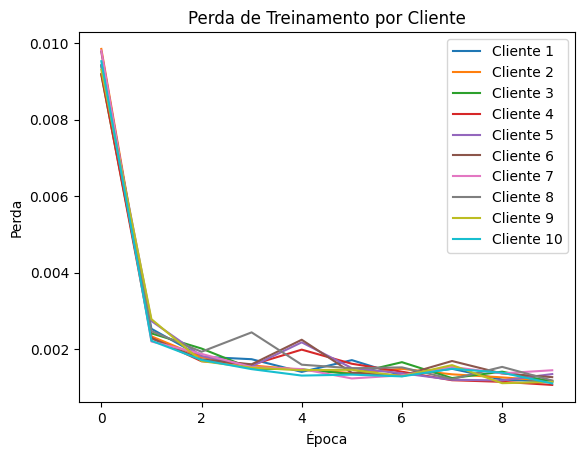

In [17]:
import matplotlib.pyplot as plt

# Testar o modelo global
accuracy = test_model(global_model, test_loader)
print(f'Accuracy of the global model: {accuracy * 100:.2f}%')

# Plotar as perdas de treinamento
for client_idx, train_losses in enumerate(all_train_losses):
    plt.plot(train_losses, label=f'Cliente {client_idx + 1}')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Perda de Treinamento por Cliente')
plt.legend()
plt.show()